In [1]:
# EXC.1

In [2]:
import quandl

In [3]:
with open('C:\Users\Hovo\Data_Scraping\key.txt','r') as f:
    key = f.read()

In [4]:
# I am using Net barter terms of trade index (2000 = 100)

In [5]:
data_arm = quandl.get('WWDI/ARM_TT_PRI_MRCH_XD_WD',authtoken=key)
data_lux = quandl.get('WWDI/LUX_TT_PRI_MRCH_XD_WD',authtoken=key)

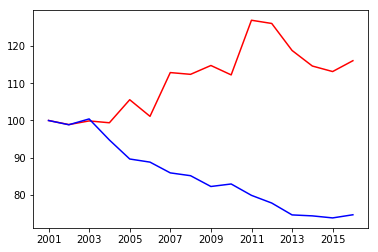

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_arm,"-r")
plt.plot(data_lux,"-b")

In [7]:
# EXC.2

In [9]:
print('The second highest value for Armenia is ' + str(data_arm.nlargest(2, "Value")['Value'][1]))

The second highest value for Armenia is 126.017130093


In [10]:
# EXC.3

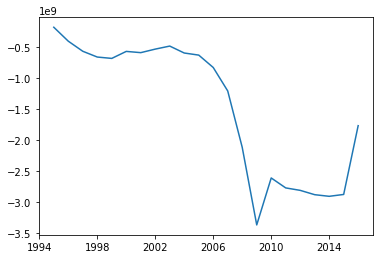

In [11]:
merch_export = quandl.get('WWDI/ARM_TX_VAL_MRCH_CD_WT',authtoken=key)
merch_import = quandl.get('WWDI/ARM_TM_VAL_MRCH_CD_WT',authtoken=key)
net_exports = merch_export - merch_import
plt.plot(net_exports)

In [13]:
# EXC.4

In [14]:
home_depot=quandl.get('EOD/HD',authtoken=key)["Close"]
wallmart=quandl.get('EOD/WMT',authtoken=key)["Close"]
am_ex=quandl.get('EOD/AXP',authtoken=key)["Close"]

In [36]:
import pandas as pd

In [45]:
df = pd.concat([home_depot, wallmart, am_ex], axis=1)
df.columns = ['home_depot', 'wallmart', 'am_ex']
df.corr()

,home_depot,wallmart,am_ex
home_depot,1.000000,0.537810,0.459362
wallmart,0.537810,1.000000,0.483339
am_ex,0.459362,0.483339,1.000000


In [46]:
# EXC.5

In [85]:
import googlemaps
with open("google_key.txt","r") as f:
    key=f.read()
gmaps=googlemaps.Client(key)

In [86]:
my_cities = ["Boston, MA", "Washington, DC", "Chicago, IL", "Sayreville, NJ", "Ocean City, MD", "Richmond, VA", "Delray Beach, FL", "Houston, TX", "Memphis, TN", "Los Angeles, CA",]

In [88]:
city_dist=[]
for city in my_cities:
    directions=gmaps.directions(city, "New York, NY", units="metric")
    for i in directions:
        legs = i["legs"]
        for j in legs:
            city_dist.append(j["distance"])
for d in range(0,len(city_dist)):
    print(my_cities[d]+"  "+city_dist[d]["text"])

Boston, MA  349 km
Washington, DC  362 km
Chicago, IL  1,283 km
Sayreville, NJ  55.0 km
Ocean City, MD  380 km
Richmond, VA  536 km
Delray Beach, FL  1,980 km
Houston, TX  2,627 km
Memphis, TN  1,764 km
Los Angeles, CA  4,501 km
